<a href="https://colab.research.google.com/github/djdongjae/DataAnalysis/blob/main/9%EC%9E%A5_%EC%8B%A4%EC%8A%B5%EC%98%88%EC%A0%9C_%EC%98%A4%EB%8F%99%EC%9E%AC_2ndReading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[09-1] '한국복지패널 데이터' 분석 준비하기

In [ ]:
!pip install pyreadstat

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
raw_welfare = pd.read_spss('/content/drive/MyDrive/데이터분석입문/Doit_Python-main/Data/Koweps_hpwc14_2019_beta2.sav')

In [4]:
welfare = raw_welfare.copy()

In [ ]:
welfare

In [ ]:
welfare.shape

In [ ]:
welfare.info()

In [ ]:
welfare.describe()

In [9]:
welfare = welfare\
.rename(
    columns = {
        'h14_g3':'sex',
        'h14_g4':'birth',
        'h14_g10':'marriage_type',
        'h14_g11':'religion',
        'p1402_8aq1':'income',
        'h14_eco9':'code_job',
        'h14_reg7':'code_region'
        })

#[09-2] 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?

229

In [10]:
welfare['sex'].dtypes

dtype('float64')

In [11]:
welfare['sex'].value_counts()

2.0    7913
1.0    6505
Name: sex, dtype: int64

230

In [12]:
welfare['sex'].value_counts()

2.0    7913
1.0    6505
Name: sex, dtype: int64

In [13]:
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

In [14]:
welfare['sex'].isna().sum()

0

In [15]:
welfare['sex'] = np.where(welfare['sex']==1, 'male', 'female')

In [16]:
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

231

In [17]:
welfare['income'].dtypes

dtype('float64')

232

In [18]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

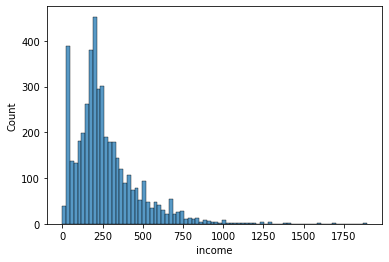

In [19]:
sns.histplot(data=welfare, x='income')

233

In [20]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [21]:
welfare['income'].isna().sum()

9884

In [22]:
welfare['income'] = np.where(welfare['income']==9999, np.nan, welfare['income'])

In [23]:
welfare['income'].isna().sum()

9884

234

In [24]:
sex_income = welfare\
.dropna(subset=['income'])\
.groupby('sex', as_index=False)\
.agg(mean_income=('income', 'mean'))

In [25]:
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


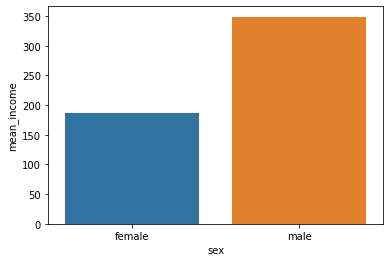

In [26]:
sns.barplot(data=sex_income, x='sex', y='mean_income')

#[09-3] 나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까?

235

In [27]:
welfare['birth'].dtypes

dtype('float64')

236

In [28]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

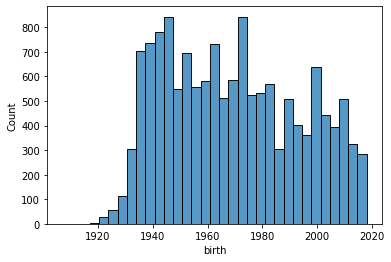

In [29]:
sns.histplot(data=welfare, x='birth')

237

In [30]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [31]:
welfare['birth'].isna().sum()

0

In [32]:
welfare['birth'] = np.where(welfare['birth']==9999, np.nan, welfare['birth'])

In [33]:
welfare['birth'].isna().sum()

0

238

In [34]:
welfare = welfare.assign(age = 2019-welfare['birth']+1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

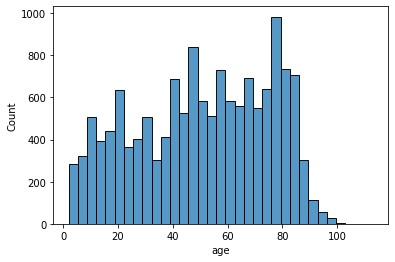

In [35]:
sns.histplot(data=welfare, x='age')

239

In [36]:
age_income = welfare\
.dropna(subset = ['income'])\
.groupby('age', as_index = False)\
.agg(mean_income = ('income', 'mean'))

age_income.head()

,age,mean_income
0,19.0,162.000000
1,20.0,121.333333
2,21.0,136.400000
3,22.0,123.666667
4,23.0,179.676471


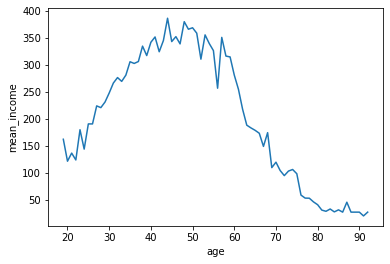

In [37]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')

#[09-4] 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많을까?

240

In [38]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

241

In [39]:
welfare = welfare.assign(ageg = np.where(welfare['age'] <= 35, 
                                         'young', np.where(welfare['age'] <= 65,
                                                           'middle', 'old')))
welfare[['ageg', 'age']].head()

,ageg,age
0,old,75.0
1,old,72.0
2,old,78.0
3,middle,58.0
4,middle,57.0


In [40]:
welfare['ageg'].value_counts()

middle    5437
old       4815
young     4166
Name: ageg, dtype: int64

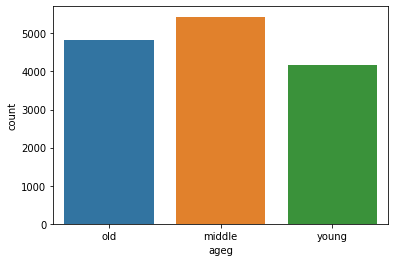

In [41]:
sns.countplot(data = welfare, x = 'ageg')

242

In [42]:
ageg_income = welfare\
.dropna(subset = ['income'])\
.groupby('ageg', as_index = False)\
.agg(mean_income = ('income', 'mean'))

ageg_income

,ageg,mean_income
0,middle,324.146709
1,old,91.853276
2,young,232.511270


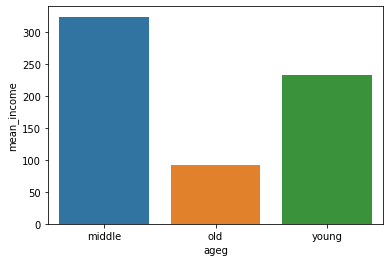

In [43]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

243

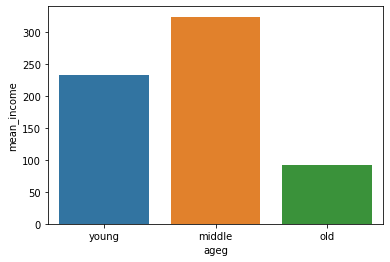

In [44]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
            order = ['young', 'middle', 'old'])

#[09-5] 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대 별로 다를까?

244

In [45]:
sex_income = welfare\
.dropna(subset = ['income'])\
.groupby(['ageg', 'sex'], as_index = False)\
.agg(mean_income = ('income', 'mean'))

245

In [46]:
sex_income

,ageg,sex,mean_income
0,middle,female,216.391777
1,middle,male,412.784939
2,old,female,63.591121
3,old,male,136.000000
4,young,female,212.276515
5,young,male,256.359375


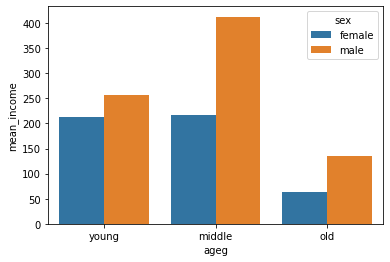

In [47]:
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old'])

246

In [48]:
sex_age = welfare\
.dropna(subset = ['income'])\
.groupby(['age', 'sex'], as_index = False)\
.agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


247

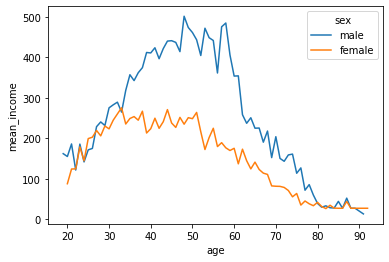

In [49]:
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

#[09-6] 직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?

248

In [50]:
welfare['code_job'].dtypes

dtype('float64')

In [51]:
welfare['code_job'].value_counts()

611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: code_job, Length: 150, dtype: int64

249

In [52]:
list_job = pd.read_excel('/content/drive/MyDrive/데이터분석입문/Doit_Python-main/Data/Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [53]:
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

250

In [54]:
welfare.dropna(subset = ['code_job'])[['code_job', 'job']]

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원
...,...,...
14410,854.0,운송차량 및 기계 관련 조립원
14411,611.0,작물 재배 종사자
14412,874.0,물품 이동 장비 조작원
14415,910.0,건설 및 광업 단순 종사자


In [55]:
job_income = welfare\
.dropna(subset = ['job', 'income'])\
.groupby('job', as_index = False)\
.agg(mean_income = ('income', 'mean'))

In [56]:
job_income

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000
...,...,...
142,화학∙고무 및 플라스틱 제품 생산기 조작원,452.714286
143,화학공학 기술자 및 시험원,489.500000
144,환경∙청소 및 경비 관련 관리자,201.000000
145,환경공학∙가스·에너지 기술자 및 시험원,511.000000


251

In [57]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [58]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumBarunGothic' 

In [59]:
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


252

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0, flags=flags)


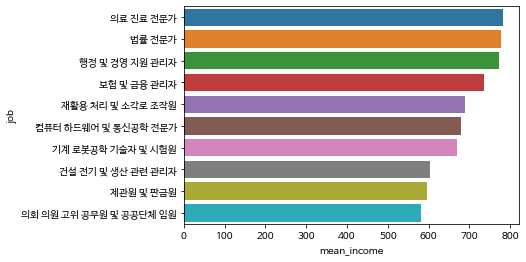

In [60]:
sns.barplot(data = top10, y = 'job', x = 'mean_income')

253

In [62]:
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8729 missing from current font.
  font.set_text(s, 0, flags=flags)


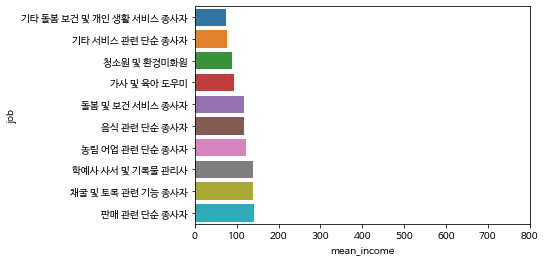

In [65]:
sns.barplot(data=bottom10, y='job', x='mean_income').set(xlim = (0,800))

#[09-7] 성별 직업 빈도 - 성별로 어떤 직업이 많을까?

In [66]:
job_male = welfare\
.dropna(subset = ['job'])\
.query('sex == "male"')\
.groupby('job', as_index = False)\
.agg(n = ('job', 'count'))\
.sort_values('n', ascending = False)\
.head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


256

In [67]:
job_female = welfare\
.dropna(subset = ['job'])\
.query('sex == "female"')\
.groupby('job', as_index = False)\
.agg(n = ('job', 'count'))\
.sort_values('n', ascending = False)\
.head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


257

[(0.0, 500.0)]

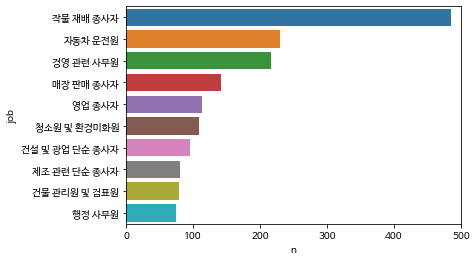

In [68]:
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = (0, 500))

[(0.0, 500.0)]

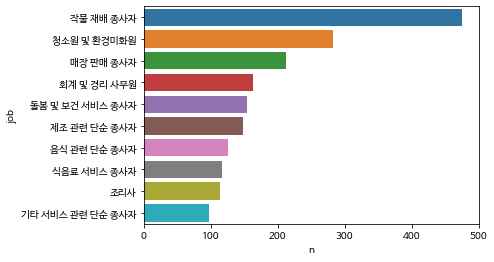

In [70]:
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = (0, 500))